In [345]:
import torch
import torch.nn as nn
import torchvision.transforms.functional as TF
from torch.optim import lr_scheduler

from matplotlib import image
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import imageio
from torch.nn import functional as F

In [346]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [347]:
image_path = '/content/drive/MyDrive/DL/Datasets/Data/images_mnist_gray.npy'

images= np.load(image_path)

In [348]:
print("shape of loaded array: ", images.shape)

shape of loaded array:  (28000, 28, 28)


##Visualizing some Images

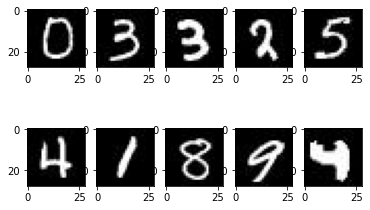

In [349]:
plt.figure(1)
plt.subplot(2,5,1)
plt.imshow(images[15], cmap= 'gray')
plt.subplot(2,5,2)
plt.imshow(images[16], cmap= 'gray')
plt.subplot(2,5,3)
plt.imshow(images[100], cmap= 'gray')
plt.subplot(2,5,4)
plt.imshow(images[200], cmap= 'gray')
plt.subplot(2,5,5)
plt.imshow(images[300], cmap= 'gray')
plt.subplot(2,5,6)
plt.imshow(images[400], cmap= 'gray')
plt.subplot(2,5,7)
plt.imshow(images[500], cmap= 'gray')
plt.subplot(2,5,8)
plt.imshow(images[600], cmap= 'gray')
plt.subplot(2,5,9)
plt.imshow(images[700], cmap= 'gray')
plt.subplot(2,5,10)
plt.imshow(images[800], cmap= 'gray')
plt.show()

##Doing some data pre processing

In [350]:
#Checking if gpu is available
if torch.cuda.is_available():
  print("cuda GPU is available")
  DEVICE = 'cuda'
else:
  print("GPU is not available")
  DEVICE = 'cpu'

cuda GPU is available


In [351]:
images = np.array(images, dtype= np.float32)
#images = (images - np.mean(images))/ np.std(images)

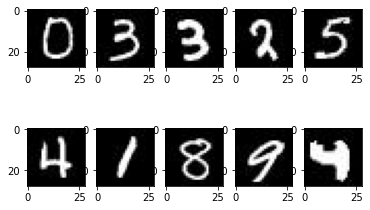

In [352]:
plt.figure(1)
plt.subplot(2,5,1)
plt.imshow(images[15], cmap= 'gray')
plt.subplot(2,5,2)
plt.imshow(images[16], cmap= 'gray')
plt.subplot(2,5,3)
plt.imshow(images[100], cmap= 'gray')
plt.subplot(2,5,4)
plt.imshow(images[200], cmap= 'gray')
plt.subplot(2,5,5)
plt.imshow(images[300], cmap= 'gray')
plt.subplot(2,5,6)
plt.imshow(images[400], cmap= 'gray')
plt.subplot(2,5,7)
plt.imshow(images[500], cmap= 'gray')
plt.subplot(2,5,8)
plt.imshow(images[600], cmap= 'gray')
plt.subplot(2,5,9)
plt.imshow(images[700], cmap= 'gray')
plt.subplot(2,5,10)
plt.imshow(images[800], cmap= 'gray')
plt.show()

In [353]:
#Moving images to DEVICE
images = torch.tensor(images, device= DEVICE)
print(images.dtype)

torch.float32


In [354]:
images_vec = images.reshape(images.shape[0], -1)
print("shape of image after flattening them: ", images_vec.shape)

shape of image after flattening them:  torch.Size([28000, 784])


#Creating Network Architecture

In [355]:
#Descriminator:

class Descriminator(nn.Module):

  def __init__(self,input_dims):     #Features is the dimension of Height and Width of the image
    super(Descriminator, self).__init__()

    self.network = nn.Sequential(
            nn.Linear(input_dims, 500), 
            nn.LeakyReLU(0.01),
            nn.Linear(500, 250),
            nn.LeakyReLU(0.01),
            nn.Linear(250, 50),
            nn.LeakyReLU(0.01),
            nn.Linear(50, 1),
            nn.Sigmoid()
        )
    
  def forward(self, input):   #input has shape(N, 784)
    out = self.network(input)
    return out



In [356]:
#Generator:
class Generator(nn.Module):

  def __init__(self,input_dims, noise_dims):     
    super(Generator, self).__init__()

    self.network = nn.Sequential(
            nn.Linear(noise_dims, 100),
            nn.LeakyReLU(0.01),
            nn.Linear(100,500 ),
            nn.LeakyReLU(0.01),
            nn.Linear(500,600 ),
            nn.LeakyReLU(0.01),
            nn.Linear(600, input_dims)
        )
    
  def forward(self, input):   #input has shape(N, 784)
    out = self.network(input)
    return out

In [357]:
images.shape

torch.Size([28000, 28, 28])

In [358]:
des = Descriminator(images.shape[2]**2).to(device= DEVICE)

In [359]:
gen = Generator(input_dims=images.shape[2]**2 , noise_dims = 5).to(device= DEVICE)

#Training the network

In [360]:
#optimzer for descriminator network. this will update the weights of the descriminator network:
optimizer_discriminator = torch.optim.Adam(des.parameters(), lr=0.0003)        #update the weights of the network Descriminator
loss_type = nn.BCELoss()
step_lr1 = lr_scheduler.StepLR(optimizer_discriminator, step_size= 5000, gamma = 0.5)  

In [361]:
#optimzer for Generator network. this will update the weights of the Generator network:
optimizer_Generator = torch.optim.Adam(gen.parameters(), lr=0.0003)        #update the weights of the network Generator
loss_type = nn.BCELoss()
step_lr2 = lr_scheduler.StepLR(optimizer_Generator, step_size= 5000, gamma = 0.5)  

In [362]:
from torch.utils.data import Dataset, DataLoader 

class CustomImageDataset(Dataset):    #Making the class that takes the index and gives the images and it's corrosponding masks
    def __init__(self, images):
        self.images = images

    def __len__(self):
        return images.shape[0]

    def __getitem__(self, idx):
        x_batch = self.images[idx]
        return x_batch


In [363]:
data = CustomImageDataset(images)

In [364]:
batchsize = 100
dataloader = DataLoader(dataset= data, batch_size= batchsize, shuffle= True)

In [365]:
noise = torch.randn(batchsize,  5).to(device= DEVICE)

In [366]:
noise.shape

torch.Size([100, 5])

Epoch:  0


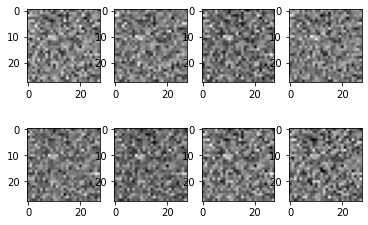

Epoch:  10


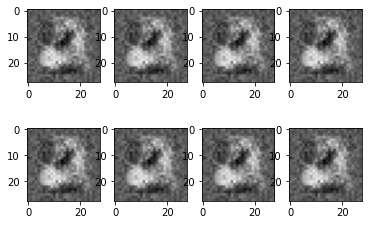

Epoch:  20


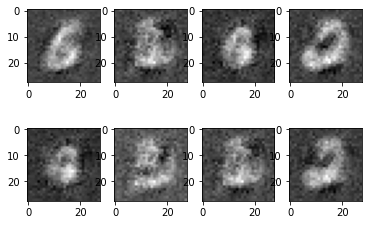

Epoch:  30


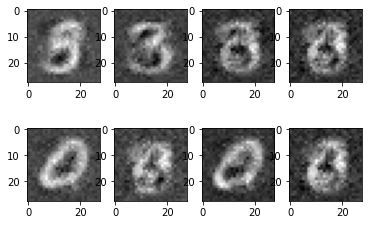

Epoch:  40


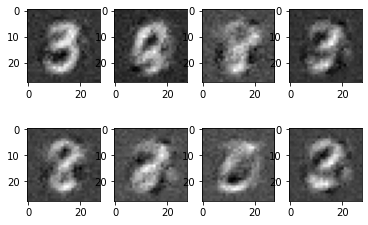

Epoch:  50


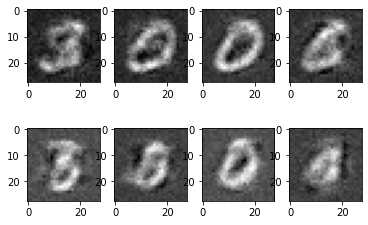

Epoch:  60


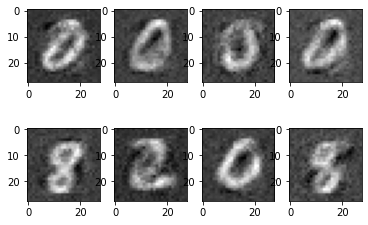

Epoch:  70


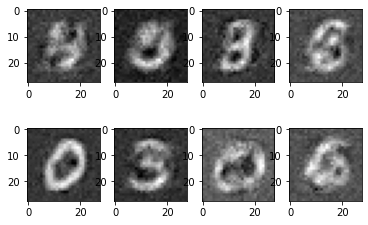

Epoch:  80


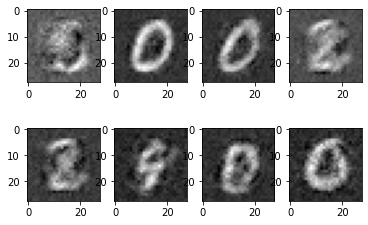

Epoch:  90


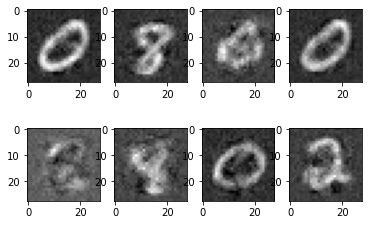

Epoch:  100


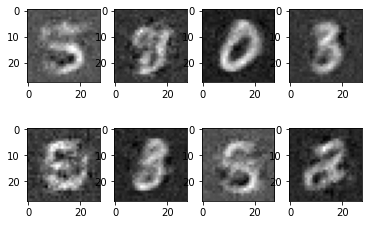

Epoch:  110


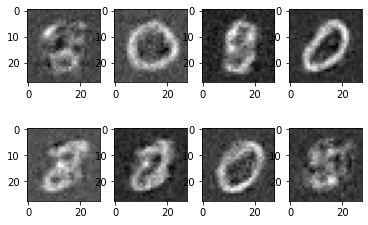

Epoch:  120


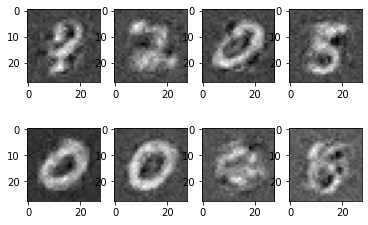

Epoch:  130


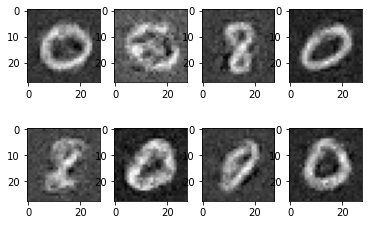

Epoch:  140


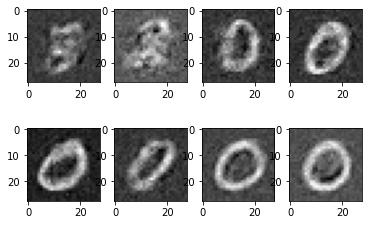

Epoch:  150


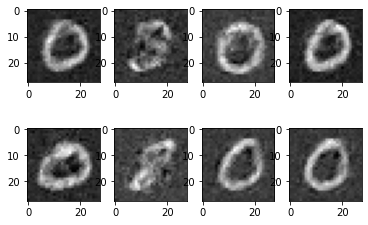

Epoch:  160


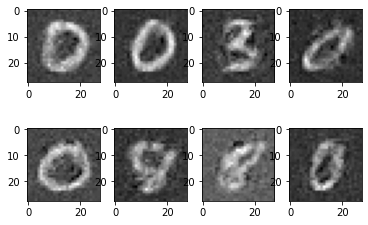

Epoch:  170


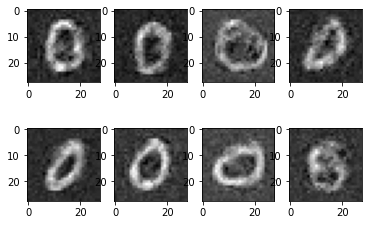

Epoch:  180


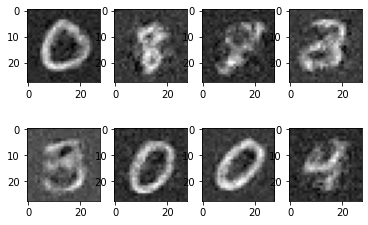

Epoch:  190


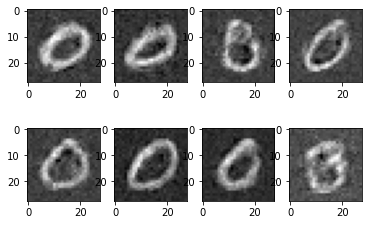

Epoch:  200


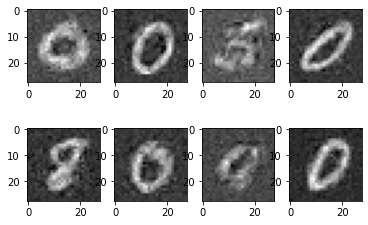

Epoch:  210


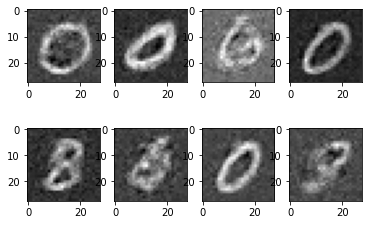

Epoch:  220


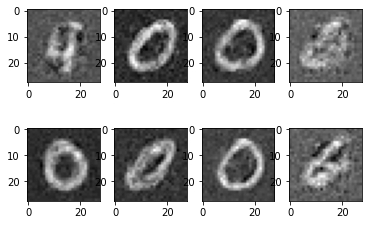

Epoch:  230


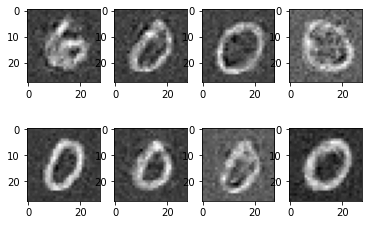

Epoch:  240


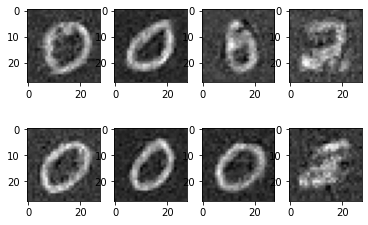

Epoch:  250


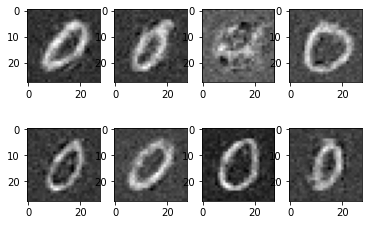

Epoch:  260


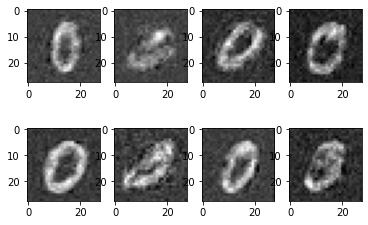

Epoch:  270


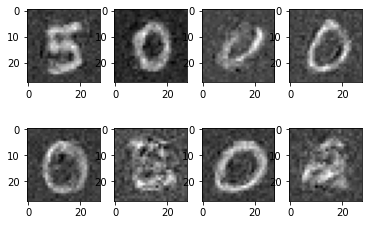

Epoch:  280


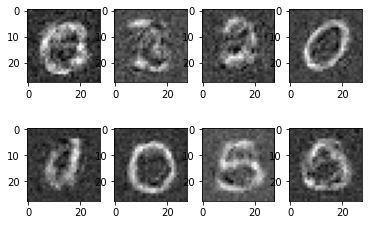

Epoch:  290


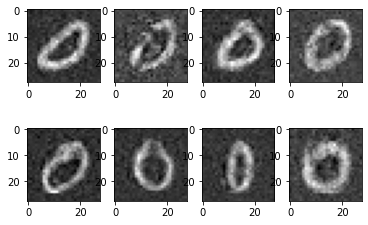

Epoch:  300


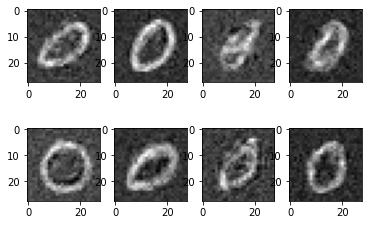

Epoch:  310


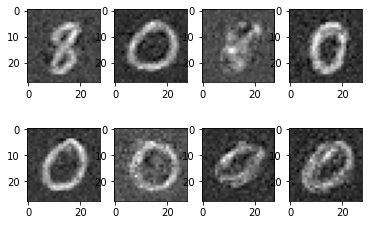

Epoch:  320


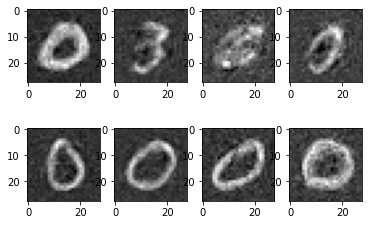

Epoch:  330


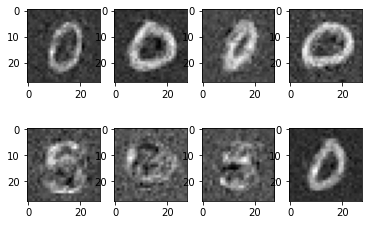

Epoch:  340


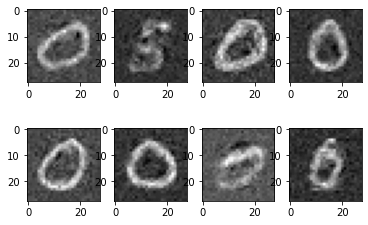

Epoch:  350


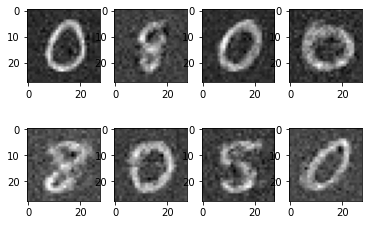

Epoch:  360


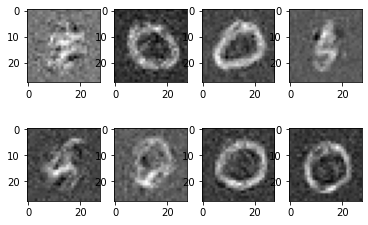

Epoch:  370


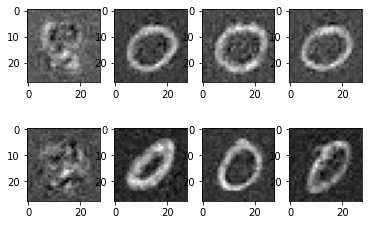

Epoch:  380


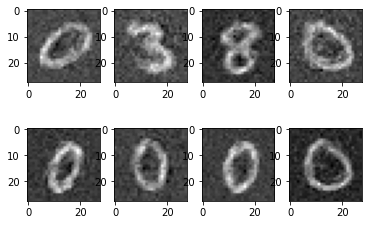

Epoch:  390


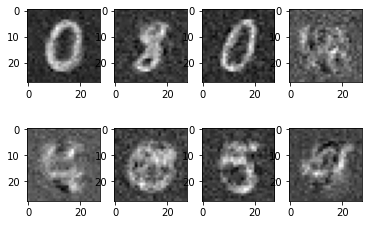

In [367]:
#Model Training
loss_graph = []
num_epochs = 400

noise_dims = 5

for j in range(num_epochs):

    with torch.no_grad():
      if j%10 == 0:
          print("Epoch: ", j)
          images_gen = gen(noise)
          plt.subplot(241)
          plt.imshow(images_gen[0].reshape(28,28).cpu().numpy(), cmap= 'gray')
          plt.subplot(242)
          plt.imshow(images_gen[10].reshape(28,28).cpu().numpy(), cmap= 'gray')
          plt.subplot(243)
          plt.imshow(images_gen[20].reshape(28,28).cpu().numpy(), cmap= 'gray')
          plt.subplot(244)
          plt.imshow(images_gen[30].reshape(28,28).cpu().numpy(), cmap= 'gray')
          plt.subplot(245)
          plt.imshow(images_gen[40].reshape(28,28).cpu().numpy(), cmap= 'gray')
          plt.subplot(246)
          plt.imshow(images_gen[50].reshape(28,28).cpu().numpy(), cmap= 'gray')
          plt.subplot(247)
          plt.imshow(images_gen[60].reshape(28,28).cpu().numpy(), cmap= 'gray')
          plt.subplot(248)
          plt.imshow(images_gen[80].reshape(28,28).cpu().numpy(), cmap= 'gray')
          plt.show()

    for i, (x_batch) in enumerate(dataloader):
      des.zero_grad()
      gen.zero_grad()

      x_batch = x_batch.reshape(-1)
      noise = torch.randn(batchsize, noise_dims).to(device= DEVICE)

      generator_out = gen(noise)   #(100,784)

      descriminator_out = des(x_batch.reshape(-1, images.shape[1]**2))

      loss_images = loss_type(descriminator_out.reshape(-1), torch.ones_like(descriminator_out).reshape(-1))

      des_noise = des(generator_out)
      loss_noise = loss_type(des_noise.reshape(-1) , torch.zeros_like(descriminator_out).reshape(-1))

      losssum = 0.5*(loss_images + loss_noise)

      losssum.backward(retain_graph = True)
      optimizer_discriminator.step()

      #Train Generator 
      outdis = des(generator_out)
      loss2 =  loss_type(outdis.reshape(-1) , torch.ones_like(outdis).reshape(-1))
      loss2.backward()
      optimizer_Generator.step()


    